<a href="https://colab.research.google.com/github/steeze1213/Deep-learning-practice/blob/main/9/practice9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>C9 텍스트를 위한 인공 신경망</h1>
<h2>3. LSTM과 GRU 셀</h2>
<h3>LSTM 신경망 훈련하기</h3>

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 0.6927 - accuracy: 0.5168 - val_loss: 0.6920 - val_accuracy: 0.5582
Epoch 2/100
  5/313 [..............................] - ETA: 9s - loss: 0.6909 - accuracy: 0.5844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 36ms/step - loss: 0.6914 - accuracy: 0.5656 - val_loss: 0.6906 - val_accuracy: 0.5944
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6892 - accuracy: 0.6040 - val_loss: 0.6877 - val_accuracy: 0.6098
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6841 - accuracy: 0.6345 - val_loss: 0.6798 - val_accuracy: 0.6420
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6561 - accuracy: 0.6712 - val_loss: 0.6306 - val_accuracy: 0.7010
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6096 - accuracy: 0.7162 - val_loss: 0.6035 - val_accuracy: 0.7168
Epoch 7/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5858 - accuracy: 0.7333 - val_loss: 0.5819 - val_accuracy: 0.7340
Epoch 8/100
313/313 [==============================] - 16s 53ms/step - loss: 0.5633 - accuracy: 0.7506 - val_loss: 0.5636 - val_accuracy: 0.74

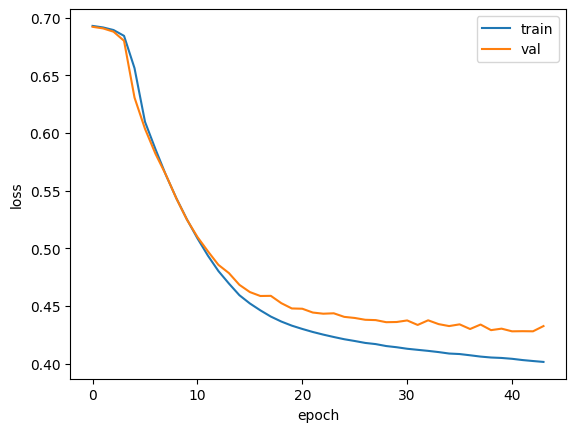

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

<h3>순환 층에 드롭아웃 적용하기</h3>

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 40ms/step - loss: 0.6926 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.5630
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6910 - accuracy: 0.5730 - val_loss: 0.6901 - val_accuracy: 0.6108
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6879 - accuracy: 0.6143 - val_loss: 0.6851 - val_accuracy: 0.6444
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6775 - accuracy: 0.6532 - val_loss: 0.6639 - val_accuracy: 0.6862
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6325 - accuracy: 0.6975 - val_loss: 0.6063 - val_accuracy: 0.7050
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5972 - accuracy: 0.7068 - val_loss: 0.5819 - val_accuracy: 0.7180
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5738 - accuracy: 0.7284 - val_loss: 0.5597 - val_ac

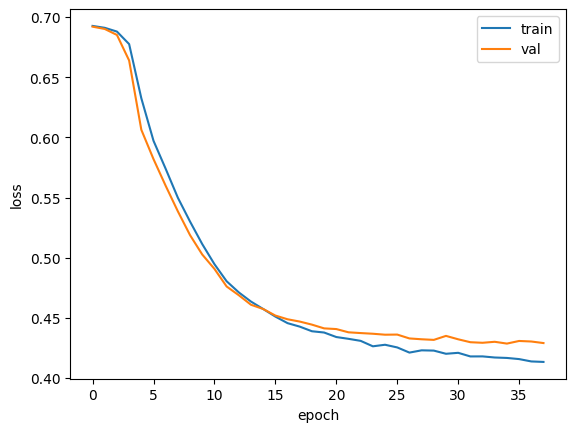

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

<h3>2개의 층을 연결하기</h3>

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 30s 84ms/step - loss: 0.6931 - accuracy: 0.5132 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 2/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6928 - accuracy: 0.5178 - val_loss: 0.6928 - val_accuracy: 0.5016
Epoch 3/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6924 - accuracy: 0.5472 - val_loss: 0.6922 - val_accuracy: 0.5134
Epoch 4/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6910 - accuracy: 0.5701 - val_loss: 0.6894 - val_accuracy: 0.6168
Epoch 5/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6817 - accuracy: 0.6330 - val_loss: 0.6667 - val_accuracy: 0.6584
Epoch 6/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6206 - accuracy: 0.6809 - val_loss: 0.5866 - val_accuracy: 0.6946
Epoch 7/100
313/313 [==============================] - 24s 77ms/step - loss: 0.5669 - accuracy: 0.7179 - val_loss: 0.5501 - val_ac

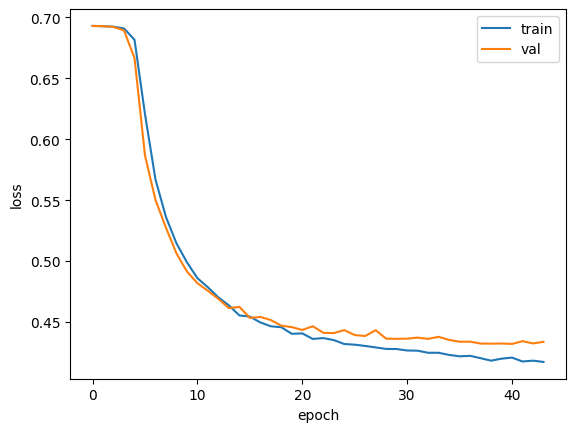

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

<h3>GRU 신경망 훈련하기</h3>

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6922 - accuracy: 0.5291 - val_loss: 0.6913 - val_accuracy: 0.5562
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6901 - accuracy: 0.5709 - val_loss: 0.6889 - val_accuracy: 0.5824
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6867 - accuracy: 0.5936 - val_loss: 0.6847 - val_accuracy: 0.5936
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6806 - accuracy: 0.6134 - val_loss: 0.6770 - val_accuracy: 0.6096
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6695 - accuracy: 0.6311 - val_loss: 0.6632 - val_accuracy: 0.6290
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6484 - accuracy: 0.6545 - val_loss: 0.6355 - val_accuracy: 0.6612
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6011 - accuracy: 0.6927 - val_loss: 0.5673 - val_ac

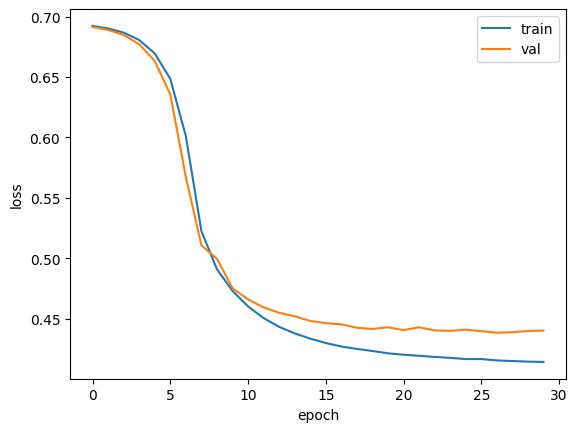

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

<h3>마무리</h3>

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 15ms/step - loss: 0.4261 - accuracy: 0.8011


[0.42605918645858765, 0.8010799884796143]